In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_df = pd.read_csv("dataset/sales_data.csv")

In [3]:
sales_df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


date - The date from June to August 2021

warehouse - The company operates three warehouses: North, Central, and West.

client-type - Retail and Wholesale

product_line - Types of products purchased

quantity - How many items were purchased

unit_price - price per item sold

total - quantity*unit price

payment - Cash, Credit card, Transfer


In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1000 non-null   object 
 1   warehouse     1000 non-null   object 
 2   client_type   1000 non-null   object 
 3   product_line  1000 non-null   object 
 4   quantity      1000 non-null   int64  
 5   unit_price    1000 non-null   float64
 6   total         1000 non-null   float64
 7   payment       1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [6]:
sales_df['date']=pd.to_datetime(sales_df["date"])

In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


In [8]:
sales_df.isna().sum()

date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

In [9]:
sales_df.duplicated().sum()

0

In [15]:
sns.boxplot(x="total", data =sales_df)
#plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

In [11]:
plt.clf()

<Figure size 640x480 with 0 Axes>

In [16]:
total_sale_per_payment= sales_df.groupby("payment", as_index =False)["total"].sum()

In [17]:
total_sale_per_payment


,payment,total
0,Cash,19199.10
1,Credit card,110271.57
2,Transfer,159642.33


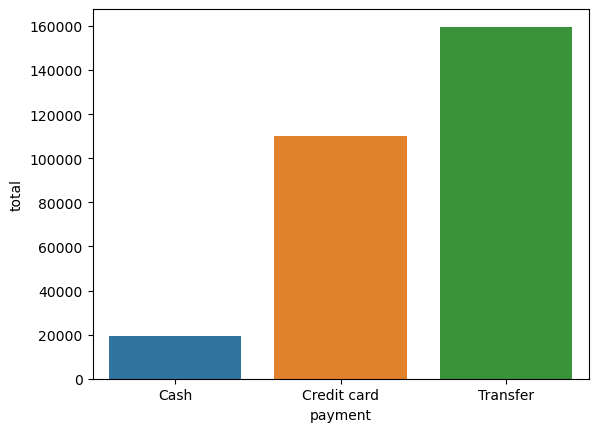

In [18]:
sns.barplot(x="payment", y= "total", data = total_sale_per_payment)
plt.show()

In [20]:
ave_unit_price = sales_df.groupby('product_line', as_index=False)['unit_price'].mean()
ave_unit_price

,product_line,unit_price
0,Breaking system,17.740522
1,Electrical system,25.585130
2,Engine,60.091803
3,Frame & body,42.832229
4,Miscellaneous,22.810738
5,Suspension & traction,33.969868


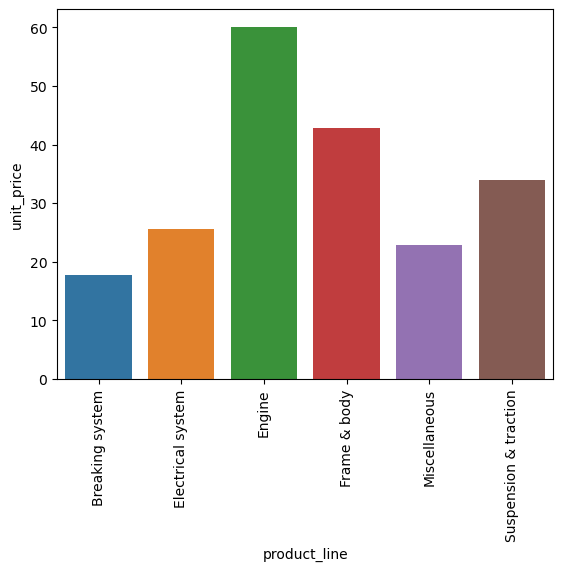

In [23]:
sns.barplot(x="product_line", y = 'unit_price', data = ave_unit_price)
plt.xticks(rotation = 90)
plt.show()

In [24]:
sales_df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [25]:
client_quantity = sales_df.groupby("client_type", as_index = False)["quantity"].mean()

In [26]:
client_quantity


,client_type,quantity
0,Retail,5.438710
1,Wholesale,23.022222


In [27]:
warehouse_total = sales_df.groupby("warehouse",as_index=False)["total"].mean()
warehouse_total

,warehouse,total
0,Central,295.797667
1,North,294.716559
2,West,260.702722


In [28]:
sales_df["month"]=sales_df["date"].dt.month
sales_df

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,month
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,6
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,6
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,6
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,6
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card,6
...,...,...,...,...,...,...,...,...,...
995,2021-08-28,Central,Retail,Electrical system,9,32.87,295.83,Credit card,8
996,2021-08-28,West,Wholesale,Breaking system,32,10.03,320.96,Transfer,8
997,2021-08-28,West,Wholesale,Electrical system,12,32.80,393.64,Transfer,8
998,2021-08-28,North,Retail,Frame & body,5,48.25,241.23,Cash,8


In [29]:
totalsales_per_month = sales_df.groupby("month", as_index = False)["total"].sum()
totalsales_per_month

,month,total
0,6,95320.03
1,7,93547.91
2,8,100245.06
